# SciPy `minimize_scalar`

`scipy.optimize.minimize_scalar` determines the lowest value in a local neighborhood of a one-dimensional scalar-valued function.  

$$
\text{min}_x f(x) \qquad f : \mathbb{R} \rightarrow \mathbb{R}
$$

[`scipy.optimize.minimize`](./Optimization_ND.ipynb) is a generalization for multidimensional scalar-valued functions.  The submodule also offers a series of global optimization routines, that work to find the lowest value on an entire range, instead of a local neighborhood. 

To use the function, you first need to import the `scipy.optimize` submodule.  SciPy works on top of NumPy, so we import that as well, and we use PyPlot to look at the data.

In [2]:
# Importing the packages
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

<div id="test_function" />

## Test Function
<hr/>

For the example, we use the test function:
$$
f(x) = x^2
$$
which has a single minimum at $x=0$.

In [3]:
# An example function with many minimums
f = lambda x: x**2

We can visually look at this function to verify that this is indeed a local minimum.

Text(0.5, 1.0, 'Test Functions')

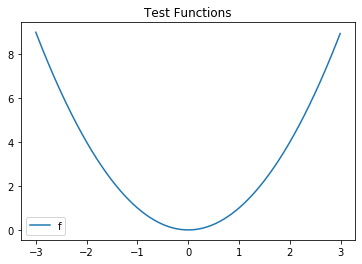

In [10]:
x = np.arange(-3,3,.01)
plt.plot(x,f(x),label="f") 
plt.legend()
plt.title("Test Functions")

## Basic Usage
<hr />

At its simplest, `minimize_scalar` only requires the function.

In [12]:
result = optimize.minimize_scalar(f)
print(result)

     fun: 0.0
    nfev: 8
     nit: 4
 success: True
       x: 0.0


## Result
<hr/>
The function returns a special variable type based on a dictionary that can store more information. Individual components can be accessed by:

In [13]:
result.x

0.0

Available components can be determined by calling:

In [14]:
result.keys()

dict_keys(['fun', 'x', 'nit', 'nfev', 'success'])

## Args 
<hr>

The `args` variable flag passes additional parameters via a tuple to the function.  

In the example, I shift the minimum via a parameter `a`.

In [21]:
# A function that uses a parameter
f_parameter = lambda x , a : (x-a)**2

result_parameter = optimize.minimize_scalar(f_parameter, args=(2,))
print(result_parameter)

     fun: 4.930380657631324e-32
    nfev: 9
     nit: 4
 success: True
       x: 1.9999999999999998


## Choosing Methods
<hr />

SciPy Optimize comes with three 1D methods:

* Brent
* Golden
* Bounded

<b>Brent</b>'s method is the default, and it uses inverse quadratic interpolation. 

Both Brent's method and the Golden Method both rely on <i>brackets</i> or a set of three   numbers `a`,`b`,`c` such that `f(b)` is less than both `f(a)` and `f(c)`.  

The bounded method instead uses <i>bounds</i>, which only has the two endpoints.  While brackets are optional for Brent's and Golden, initial bounds are required to start the Bounded Method.

In [16]:
result_Brent = optimize.minimize_scalar(f,method='Brent')
print(result_Brent)

     fun: 0.0
    nfev: 8
     nit: 4
 success: True
       x: 0.0


In [17]:
result_golden = optimize.minimize_scalar(f,method='golden')
print(result_golden)

     fun: 0.0
    nfev: 818
     nit: 813
 success: True
       x: 1.5717277788484873e-162


In [18]:
result_bounded = optimize.minimize_scalar(f,method='bounded',bounds=[-1,1])
print(result_bounded)

     fun: 7.703719777548943e-34
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: -2.7755575615628914e-17


## Options
<hr>

The maximum number of iterations `maxiter` can be passed in a dictionary to the flag `options`.  While most 1D functions converge in a trivial amount of time, sometimes, you may want manual control to avoid excessive resources.

Here's an example for changing the maximum number of iterations:

In [36]:
result_maxiter = optimize.minimize_scalar(f,options={'maxiter':3})
print(result_maxiter)

     fun: 0.0
    nfev: 7
     nit: 3
 success: False
       x: 0.0
